In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [105]:
import sys, inspect


# importing FICUS-specific modules
# OCAS_lib for dealing with hdf files,
# Linearity for the correction of CCD non-lineariry
# and Normalization for the calibration of data using
# the center of the solar disc

sys.path.append('/home/marco/Desktop/solar/FICUS/PYTHON')
from OCAS_lib import Light, Calibration, Measurement
from NormalizationModule import Normalization, Linearity

# loading calculated px -> wavelength relations

wlc = np.load("/home/marco/Desktop/solar/FICUS/useful_files/WL_range_C.npy")
wld = np.load("/home/marco/Desktop/solar/FICUS/useful_files/WL_range_D.npy")

# loading resampled FTS atlases
# aC[0] ... wavelengths
# aC[1] ... S_\nu values
aC = np.load("/home/marco/Desktop/solar/FICUS/useful_files/resampled_C.npy")
aD = np.load("/home/marco/Desktop/solar/FICUS/useful_files/resampled_D.npy")

# Accessing measurements using OCAS_lib objects (Light, Calibration)

In [67]:
# use: measurement = Light("location", dataset number)
# if dataset number not given, a terminal menu is shown
# (menu does not work in the jupyter environment)

mC = Light("/home/marco/Desktop/solar/DATA/2020-09-24/center/center_2020-09-24_HR4C5177.hdf", -2)
mD = Light("/home/marco/Desktop/solar/DATA/2020-09-24/center/center_2020-09-24_HR4D290.hdf", -2)


# Use of the Linearity module
linearity_correction ... Linearity Class object

linearity_coef ... number from (0 , 1) giving the coefficient of the correction

linearity_corrected ... values corrected for the linearity issue

It is neccesary to DIVIDE by the linearity coefficient.
After application of the correction, values must be
larger than original data!

In [82]:
linearity_correction_C = Linearity(mC.data, "C")
linearity_coef_C = linearity_correction_C.linearity_ccd()
linearity_corrected_C = mC.data / linearity_coef_C

linearity_correction_D = Linearity(mD.data, "D")
linearity_coef_D = linearity_correction_D.linearity_ccd()
linearity_corrected_D =  mD.data / linearity_coef_D

plotting difference between raw data and data corrected for linearity

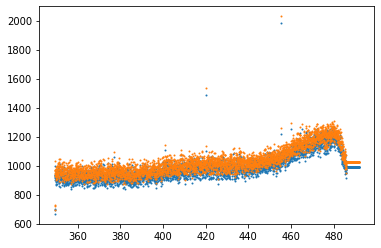

In [83]:
plt.scatter(wlc, mC.data[150], s=1)
plt.scatter(wlc, linearity_corrected_C[150], s=1)

# Loading and applying dark "frame" correction

dC ... dark measurements for C spectrometer

should the master-dark be corrected for linearity? possibly

In [79]:
dC = Calibration("/home/marco/Desktop/solar/DATA/2020-09-24/dark/dark_2020-09-24_HR4C5177.hdf", -2)
dD = Calibration("/home/marco/Desktop/solar/DATA/2020-09-24/dark/dark_2020-09-24_HR4D290.hdf", -2)

In [90]:
dataC = linearity_corrected_C - dC.master
dataD = linearity_corrected_D - dD.master

# Normalization procedure

kC, kD correspond to values of ATLAS / corrected measurement

In [127]:
avgC = np.average(dataC, axis=0)
avgD = np.average(dataD, axis=0)
kC = aC[1] / avgC
kD = aD[1] / avgD


NC = Normalization("C", wlc)
ND = Normalization("D", wld)

filtered_trend is the method that returns
the final coefficients:

data * filtered_trend = calibrated data

ie. it is in the "units" of kC and kD (atlas / data)

In [160]:
ftC = NC.filtered_trend(kC)
ftD = NC.filtered_trend(kD)

/home/marco/Desktop/solar/FICUS/PYTHON/NormalizationModule.py:187: RankWarning: Polyfit may be poorly conditioned
  cs_fit = np.polyfit(self.wl[self.second_dev(k)[2]], k[self.second_dev(k)[2]], 11)
/home/marco/Desktop/solar/FICUS/PYTHON/NormalizationModule.py:187: RankWarning: Polyfit may be poorly conditioned
  cs_fit = np.polyfit(self.wl[self.second_dev(k)[2]], k[self.second_dev(k)[2]], 11)


example of usage of the calibration coefficient:

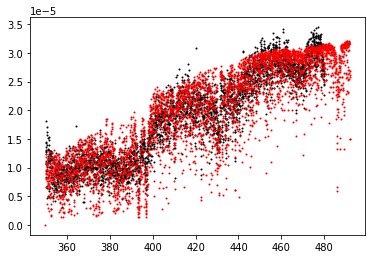

In [171]:
calibrated_frame = dataC[150] * ftC

# masking the data using a simple crop
# defined in the Normalization Module
maskC = NC.first_crop(kC)


# scatter plot of calibrated data in black
plt.scatter(wlc[mask], calibrated_frame[mask], s=1, c="k")

# FTS altas for comparison in red
plt.scatter(aC[0], aC[1], s=1, c="r")

In [ ]:
And the procedure is analogous for
the spec

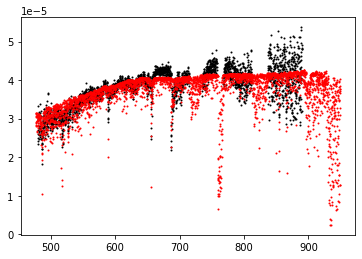

In [174]:
calibrated_frame_example_D = dataD[150] * ftD

# masking the data using a simple crop
# defined in the Normalization Module
maskD = ND.first_crop(kD)


# scatter plot of calibrated data in black
plt.scatter(wld[maskD], calibrated_frame_example_D[maskD], s=1, c="k")

# FTS altas for comparison in red
plt.scatter(aD[0], aD[1], s=1, c="r")